# Imporing Libraries

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


# Dataset Preparation

In [2]:
# Importing the dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

# Functions

In [3]:
# Definition of Scalar Matrix


def split_scalar(indep_X, dep_Y):
    X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size=0.25, random_state=0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test


# Applying PCA
def get_pca(X_train,X_test,n):
    # Applying PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components = n)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    explained_variance = pca.explained_variance_ratio_
    return X_train,X_test,explained_variance


# Definition of Confusion Matric    
def cm_prediction(classifier,X_test):
     y_pred = classifier.predict(X_test)
        
     # Making the Confusion Matrix
     from sklearn.metrics import confusion_matrix
     cm = confusion_matrix(y_test, y_pred)
        
     from sklearn.metrics import accuracy_score 
     from sklearn.metrics import classification_report
        
     Accuracy=accuracy_score(y_test, y_pred )
        
     report=classification_report(y_test, y_pred)
     return  classifier,Accuracy,report,X_test,y_test,cm

# Definition for Logistic Regression 
def logistic(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
       
        return  classifier,Accuracy,report,X_test,y_test,cm      

# Definition for SVM Linear Regression    
def svm_linear(X_train,y_train,X_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'linear', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

# Definition of Support Vector Matrix    
def svm_NL(X_train,y_train,X_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
    
# Definition of Navie Regression
def Navie(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm         
    
# Definition for K-Nearest Neighbor Regression    
def knn(X_train,y_train,X_test):
           
        # Fitting K-NN to the Training set
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

# Definition for Decision Tree Regression
def Decision(X_train,y_train,X_test):
       
        # Fitting K-NN to the Training set
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm      

# Defnition for Random Forest Regression
def random(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
    
def selectk_Classification(pcalog,acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf): 
    
    dataframe=pd.DataFrame(index=['ChiSquare'],columns=['PCA','Logistic','SVMl','SVMnl','KNN','Navie','Decision','Random'])
    for number,idex in enumerate(dataframe.index):   
        dataframe['PCA'][idex]     =acclog[number]       
        dataframe['Logistic'][idex]=acclog[number]       
        dataframe['SVMl'][idex]    =accsvml[number]
        dataframe['SVMnl'][idex]   =accsvmnl[number]
        dataframe['KNN'][idex]     =accknn[number]
        dataframe['Navie'][idex]   =accnav[number]
        dataframe['Decision'][idex]=accdes[number]
        dataframe['Random'][idex]  =accrf[number]
    return dataframe
    
# Function to Plot the graph
def get_plot(X_train, y_train, X_test, y_test, classifier):  
    # Visualising the Training set results
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    plt.title('Logistic Regression (Training set)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

#   Visualising the Test set results
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    plt.title('Logistic Regression (Test set)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

# Splitting the dataset into the Training set and Test set

In [4]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = split_scalar(X,y)

## Execution

In [9]:
# Initialize accuracy lists
pca      = []
acclog   = []
accsvml  = []
accsvmnl = []
accknn   = []
accnav   = []
accdes   = []
accrf    = []
X_train,X_test,pcar=get_pca(X_train,X_test,2)
pca.append(pcar)


# Logistic Regression
clf_log, acc, report, X_test, y_test, cm = logistic(X_train, y_train, X_test)
acclog.append(acc)

# SVM Linear
clf_svml, acc, report, X_test, y_test, cm = svm_linear(X_train, y_train, X_test)
accsvml.append(acc)

# SVM Non-Linear
clf_svmnl, acc, report, X_test, y_test, cm = svm_NL(X_train, y_train, X_test)
accsvmnl.append(acc)

# KNN
clf_knn, acc, report, X_test, y_test, cm = knn(X_train, y_train, X_test)
accknn.append(acc)

# Naive Bayes
clf_nav, acc, report, X_test, y_test, cm = Navie(X_train, y_train, X_test)
accnav.append(acc)

# Decision Tree
clf_des, acc, report, X_test, y_test, cm = Decision(X_train, y_train, X_test)
accdes.append(acc)

# Random Forest
clf_rf, acc, report, X_test, y_test, cm = random(X_train, y_train, X_test)
accrf.append(acc)

# Compare models
result = selectk_Classification(pca,acclog, accsvml, accsvmnl, accknn, accnav, accdes, accrf)

# Output

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


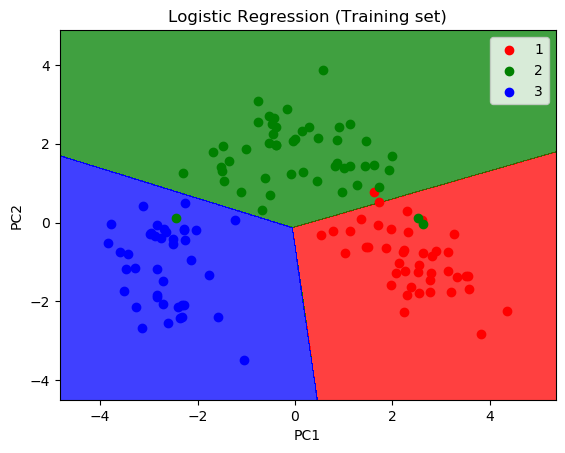

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


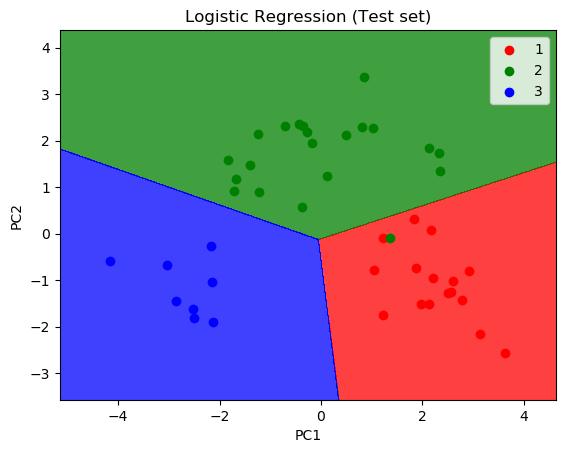

In [10]:
# Plot the last classifier (for example)
get_plot(X_train, y_train, X_test, y_test, clf_log)

In [11]:
result

,PCA,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778
